# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import os
import numpy as np
import cv2
import csv
import glob
data_path = 'traffic-signs-data'
os.listdir(data_path)

['test.p', 'valid.p', 'train.p', '.AppleDouble']

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = os.path.join(data_path, 'train.p')
validation_file= os.path.join(data_path, 'valid.p')
testing_file = os.path.join(data_path, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Import traffic signs class names
signs_class=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_class.append((row['SignName']))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
print(type(X_train))
print("train:", X_train.shape, y_train.shape)
print("valid:", X_valid.shape, y_valid.shape)
print("test:", X_test.shape, y_test.shape)

<class 'numpy.ndarray'>
train: (34799, 32, 32, 3) (34799,)
valid: (4410, 32, 32, 3) (4410,)
test: (12630, 32, 32, 3) (12630,)


In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

# DEPTH OF INPUT IMAGE
n_colors = image_shape[-1]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of color channels in inputs =", n_colors)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Number of color channels in inputs = 3


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### Let's plot 25 random traffic signs from test data.

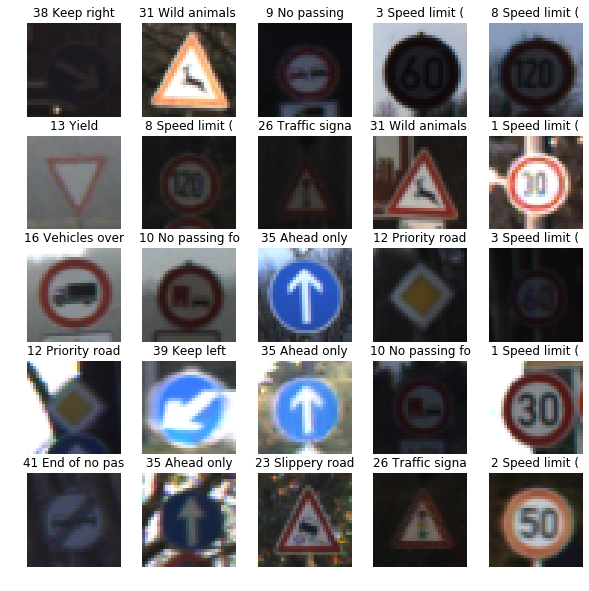

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Plotting a square matrix of signs.
def plot_imgs(imgs, figsize=(10,10), rows=8, save=None, titles=None):
    assert len(imgs) % rows == 0, "number of images should be a multiple of 'rows'"
    ncols = len(imgs)//rows
    plot = plt.figure(figsize=figsize)
    for i in range(len(imgs)):
        subplot = plot.add_subplot(rows, ncols, i+1)
        plt.axis('off')
        if titles is not None:
            plt.title(titles[i])
        plt.imshow(imgs[i])
    if save is not None:
        plt.savefig('visualizations/' + save, bbox_inches='tight')
        
# Makes plot labels with class number and class name.
def make_labels_from_idx(rand_idx, y_train):
    classes = y_train[rand_idx]
    names = np.array(signs_class)
    labels = []
    for i in range(len(classes)):
        label = "{} {}".format(classes[i], names[classes[i]][:13])
        labels.append(label)
    return labels

# We use random seed so that result will stay the same.
np.random.seed(42)
rows = 5
# Random indices of signs.
rand_idx = np.random.randint(n_train, size=rows**2)

# Create labels for the plot.
labels = make_labels_from_idx(rand_idx, y_train)

# Plot 25 random signs.
plot_imgs(X_train[rand_idx], rows=rows, titles=labels, save='matrix.png')

### Let us examing how balanced classes are in the training data set.

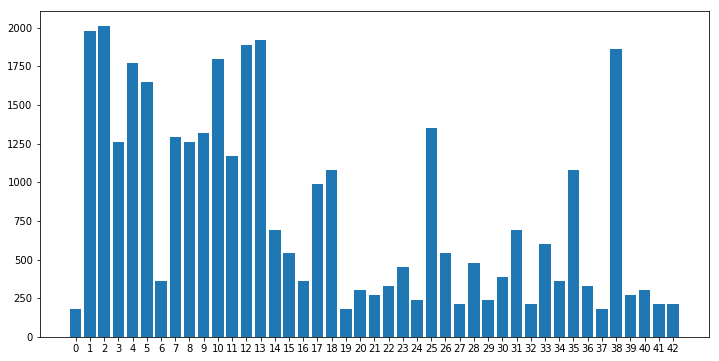

In [6]:
def examine_classes(y, save=None):
    # count occurences of each class
    unique, counts = np.unique(y, return_counts=True)
    classes_dict = dict(zip(unique, counts))

    # make a simple bar chart
    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(range(len(classes_dict)), classes_dict.values(), align='center')
    plt.xticks(range(len(classes_dict)), classes_dict.keys())

    if save is not None:
        plt.savefig('visualizations/' + save, bbox_inches='tight')
    
    plt.show()
    
    return classes_dict

classes_dict = examine_classes(y_train, save='hist-unprocessed.png')


As can be seen above, there is quite an imbalance among classes. This might prove to be a problem for our model. If this is the case, there are ways to fix it by using data augmentation to balance classes, for example. One thing to note is that even the smallest classes have at least 200 examples, which feels to be enough for a deep convolutional network. Let's see how it goes.



## Augmenting Data

In [10]:
classes_dict.items()

dict_items([(0, 180), (1, 1980), (2, 2010), (3, 1260), (4, 1770), (5, 1650), (6, 360), (7, 1290), (8, 1260), (9, 1320), (10, 1800), (11, 1170), (12, 1890), (13, 1920), (14, 690), (15, 540), (16, 360), (17, 990), (18, 1080), (19, 180), (20, 300), (21, 270), (22, 330), (23, 450), (24, 240), (25, 1350), (26, 540), (27, 210), (28, 480), (29, 240), (30, 390), (31, 690), (32, 210), (33, 599), (34, 360), (35, 1080), (36, 330), (37, 180), (38, 1860), (39, 270), (40, 300), (41, 210), (42, 210)])

In [11]:
def get_largest_class(classes_dict):
    """
    returns a tuple: (class, num_data)
    """
    largest = 0
    cl = None
    for k in classes_dict.keys():
        if classes_dict[k] > largest:
            largest = classes_dict[k]
            cl = k

    print("Largest class is {} ({}).".format(cl, largest))
    return (cl, largest)

largest = get_largest_class(classes_dict)[1]

Largest class is 2 (2010).


In [13]:
augmentation_dict = {}

for k in classes_dict.keys():
    current_n = classes_dict[k]
    multiplier = np.floor((largest - current_n) / current_n)
    augmentation_dict[k] = multiplier

def augment_image(img, rotation_range = 15, shear_range = 2, translation_range = 10):
    '''
    This routine performs data augmentation by 
    applying rotation, shear and affine translation.
    '''
    
    # Rotation
    rotation_angle = np.random.uniform(rotation_range) - rotation_range / 2
    n_row, n_col, _ = img.shape    
    rotation_matrix = cv2.getRotationMatrix2D((n_col / 2, n_row / 2), rotation_angle, 1)
    img = cv2.warpAffine(img, rotation_matrix, (n_col, n_row))

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_matrix = cv2.getAffineTransform(pts1, pts2)
    img = cv2.warpAffine(img, shear_matrix, (n_col, n_row))

    # Translation
    trans_hor = translation_range * np.random.uniform() - translation_range / 2
    trans_vert = translation_range * np.random.uniform() - translation_range / 2
    translation_matrix = np.float32([[1, 0, trans_hor], [0, 1, trans_vert]])
    img = cv2.warpAffine(img, translation_matrix, (n_col, n_row))
    
    return img

def augmenter(X_data, y_data, classes_dict):
    """
    make copy of X
    make copy of y
    get the number of the largest class
    for image in train images[non-augmented]:
        retreive class of that image
        while classes dict[class] < largest number:
            X.append(augmented image)
            y.append(class)
            classes dict[class] += 1
    return X_augmented, y_augmented
    """
    stats_dict = classes_dict.copy()
    X = np.copy(X_data)
    y = np.copy(y_data)
    largest = get_largest_class(classes_dict)[1]
    print("Allocating memory")
    XX = np.zeros((43 * largest, 32, 32, 3), dtype=np.uint8)
    yy = np.zeros(43 * largest, dtype=np.uint8)
    num_images = X.shape[0]
    aug_X = []
    aug_y = []
    finished_classes = np.zeros(43)
    finished = False
    while not finished:
        for i in range(num_images):
            target_class = y[i]
            if stats_dict[target_class] < largest:
                img = X[i]
                augmented_img = augment_image(img)
                aug_X.append(augmented_img)
                aug_y.append(target_class)
                stats_dict[target_class] += 1
            else:
                if finished_classes[target_class] != 1:
                    finished_classes[target_class] = 1
                if np.sum(finished_classes) == 43:
                    finished = True
    print("Appending original images")
    for i in range(num_images):
        XX[i] = X[i]
        yy[i] = y[i]
        
    rows = 5
    ncols = 5
    
    rand_idx = np.random.randint(n_train, size=rows**2)
    plot_imgs(XX[rand_idx], rows=rows)
    
    print("Appending augmented images...")
    for i in range(num_images, 43 * largest):
        XX[i] = aug_X[i - num_images]
        yy[i] = aug_y[i - num_images]
    print("orig", len(X), len(y))
    print("aug", len(aug_X), len(aug_y))
    print("total", len(XX), len(yy))
    
    print(aug_X[0].shape)
    
    rand_idx = np.random.randint(len(aug_X), size=rows**2)
    plot = plt.figure(figsize=(10,10))
    for i, idx in enumerate(rand_idx):
        subplot = plot.add_subplot(rows, ncols, i+1)
        plt.imshow(aug_X[idx])
    
    return XX, yy

Largest class is 2 (2010).
Allocating memory
Appending original images
Appending augmented images...
orig 34799 34799
aug 51631 51631
total 86430 86430
(32, 32, 3)


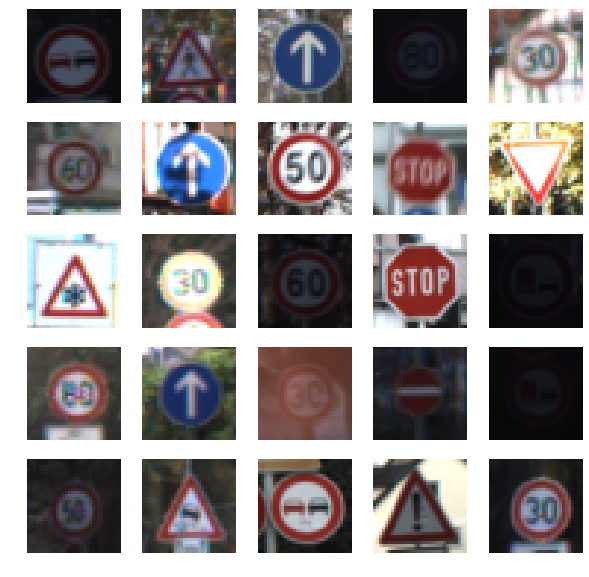

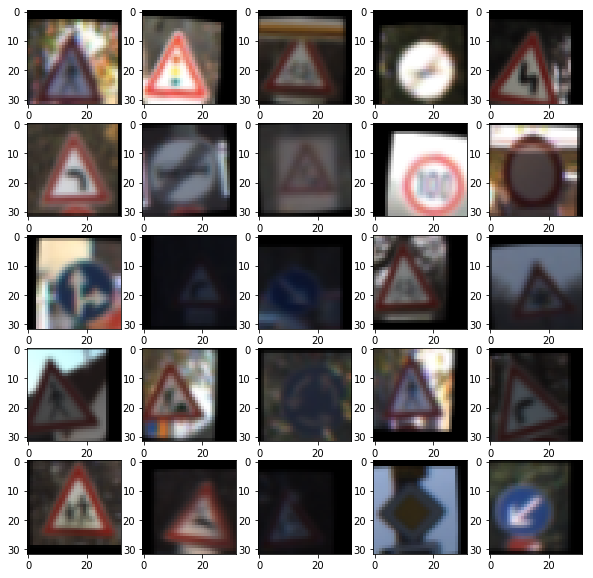

In [14]:
XX, yy = augmenter(X_train, y_train, classes_dict=classes_dict)

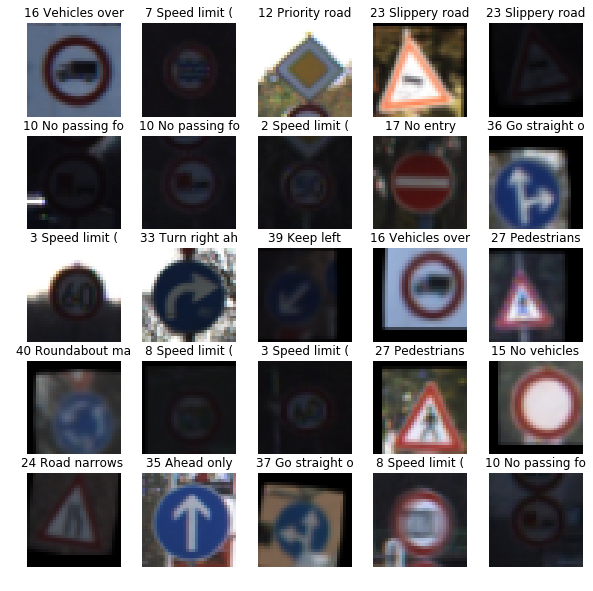

In [15]:
# np.random.seed(42)
rows = 5
rand_idx = np.random.randint(43 * 2010, size=rows**2)
labels_aug = make_labels_from_idx(rand_idx, yy)
plot_imgs(XX[rand_idx], rows=rows, titles=labels_aug, save='matrix-aug.png')

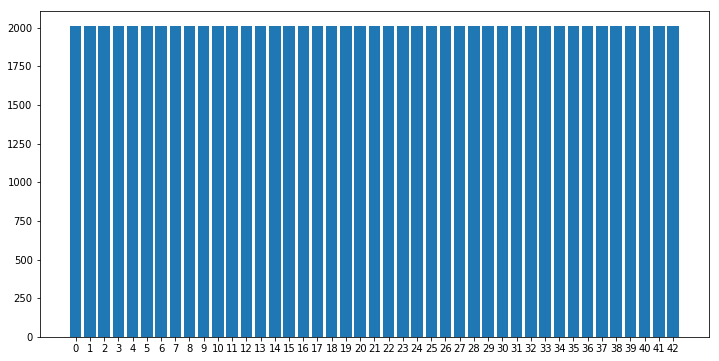

In [16]:
balanced_classes_dict = examine_classes(yy)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

## Pre-process the Data Set (normalization, grayscale, etc.)
Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, (pixel - 128)/ 128 is a quick way to approximately normalize the data and can be used in this project.

Other pre-processing steps are optional. You can try different techniques to see if it improves performance.

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Note: approach taken for normalizing data is similar to the [VGG16](https://neurohive.io/en/popular-networks/vgg16/) paper. First, calculate means and SDs for every color channel for all training data set. Then store them as constants for further use in preprocessing.

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [17]:
# calculate statistics for each color channel
MEANS = np.mean(X_train, axis = (0, 1, 2))
STDS = np.std(X_train, axis = (0, 1, 2))
print(MEANS)
print(STDS)

[86.69812205 79.49594061 81.83870445]
[69.28387882 66.26993615 67.76634548]


In [19]:
# check if normalized data has mean of 0 and SD of 1, which it does
# this means that my normalization approach works
print(np.mean((X_train - MEANS) / STDS, axis=(0,1,2)))
print(np.std((X_train - MEANS) / STDS, axis=(0,1,2)))

[ 7.49232908e-13 -4.20496332e-13  6.72432958e-14]
[1. 1. 1.]


In [20]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def preprocess(x):
    '''
    This preprocessing calculates z-scores across all training data
    by subtracting mean and dividing by SD for every pixel.
    Normalization is for each color channel individually.
    Assumes data is in shape: N_imgs x width x height x channels
    '''
    assert (len(x.shape) == 4) or (len(x.shape) == 3), "Data should be 4- or 3-dimensional."
    assert (x.shape[-1] == 1) or (x.shape[-1] == 3), "Only 1 or 3 color channels supported."
    x_normalized = np.copy(x)
    return (x_normalized - MEANS) / STDS

X_train_norm = preprocess(XX)
X_valid_norm = preprocess(X_valid)
X_test_norm = preprocess(X_test)
y_train = yy

In [21]:
# Convert to grayscale
X_train_gry = np.sum(X_train_norm/3, axis=3, keepdims=True)
X_valid_gry = np.sum(X_valid_norm/3, axis=3, keepdims=True)
X_test_gry = np.sum(X_test_norm/3, axis=3, keepdims=True)

print('RGB shape:', X_train_norm.shape)
print('Grayscale shape:', X_train_gry.shape)

X_train_final = X_train_gry
X_valid_final = X_valid_gry
X_test_final = X_test_gry

RGB shape: (86430, 32, 32, 3)
Grayscale shape: (86430, 32, 32, 1)


In [22]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import sys
import tensorflow as tf
from sklearn.utils import shuffle
import time

from numba import jit
device_name = sys.argv[1]  # Choose device from cmd line. Options: gpu or cpu
if device_name == "gpu":
    device_name = "/XLA_GPU:0"
else:
    device_name = "/cpu:0"


EPOCHS = 201
BATCH_SIZE = 32

### LeNet-5 Model Architecture

[LeNet-5 [1998, paper by LeCun et al.]](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)

<img src="./examples/LeNet-Lab-Solution.png">

In [19]:
from tensorflow.contrib.layers import flatten

def compatible_convolutional_noise_shape(Y):
    noiseshape = tf.shape(Y)
    noiseshape = noiseshape * tf.constant([1,0,0,1]) + tf.constant([0,1,1,0])
    return noiseshape

@jit
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    pkeep = 0.65
    pkeep_conv = 0.65

    # Layer 0: Convolutional. 3 1x1 convolutional filters -> optimize for best color map
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1,1,3,3), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros(3))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1, 1, 1, 1], padding='VALID') + conv0_b
    
    # ------
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1l  = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Relu Activation.
    conv1r = tf.nn.relu(conv1l)
    conv1d = tf.nn.dropout(conv1r, pkeep_conv, compatible_convolutional_noise_shape(conv1r))
    
    # ------
    
    # Layer 2: Convolutional. Input = 30x30x16. Output = 28x18x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2l   = tf.nn.conv2d(conv1d, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Relu Activation.
    conv2r = tf.nn.relu(conv2l)
    conv2d = tf.nn.dropout(conv2r, pkeep_conv, compatible_convolutional_noise_shape(conv2r))

    # Max Pooling. Input = 28x28x32. Output = 14x14x32.
    conv2 = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # -----
    
    # Layer 3: Convolutional. Input = 14x14x32. Output: 12x12x64.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3,3,32,64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3l  = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Activation
    conv3r  = tf.nn.relu(conv3l)
    conv3d  = tf.nn.dropout(conv3r, pkeep_conv, compatible_convolutional_noise_shape(conv3r))
    
    # Max Pooling. Input = 12x12x64. Output = 6x6x64.
    conv3 = tf.nn.max_pool(conv3d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # -----
    
    # Layer 4: Flatten. Input = 6x6x64. Output = 2304.
    
    fc0   = flatten(conv3)

    # Layer 5: Fully Connected. Input = 2304. Output = 256.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2304, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1l  = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1r  = tf.nn.relu(fc1l)
    fc1d  = tf.nn.dropout(fc1r, pkeep)

    # -----
    
    # Layer 4: Fully Connected. Input = 256. Output = 128.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2l   = tf.matmul(fc1d, fc2_W) + fc2_b

    # Activation.
    fc2r   = tf.nn.relu(fc2l)
    fc2d   = tf.nn.dropout(fc2r, pkeep)

    # -----
    
    # Layer 5: Fully Connected. Input = 128. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2d, fc3_W) + fc3_b

    return logits

### ConvNet Model Architecture

[ConvNet [traffic sign classification journal article 2011, paper by Sermanet/LeCunn.]](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)

<img src="./examples/modifiedLeNet.jpeg">

In [23]:
from tensorflow.contrib.layers import flatten

def ConvNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID',name='convolution1')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution2')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    return logits

print('done')

done


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [24]:
# placeholders for data
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0009

# outputs from the network
logits = ConvNet(x)

# loss function (to be optimized, depends on output of LeNet)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(one_hot_y,logits)

# we minimize the mean loss across the batch
loss_operation = tf.reduce_mean(cross_entropy)

# adaptive optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# accuracy score to evaluate performance of models
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# will be used to save weights
saver = tf.train.Saver()

Instructions for updating:
Colocations handled automatically by placer.
layer 1 shape: (?, 28, 28, 6)
Instructions for updating:
Use keras.layers.flatten instead.
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
# routine for evaluating performance for a given training epoch
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

@jit
def evaluate_epoch(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [ ]:
# function to perform training-evaluation loop

with tf.device(device_name):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train_final)

        print("Training...")
        print()
        # to 
        train_log = []
        valid_log = []
        for i in range(EPOCHS):
            # for timing
            start = time.time()
            print("EPOCH {} ...".format(i+1))

            # train loop itself – this is where all magic happens
            X_train_final, y_train = shuffle(X_train_final, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_final[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
                

            # for cheking for overfitting / underfitting
            train_accuracy = evaluate_epoch(X_train_final, y_train)
            valid_accuracy = evaluate_epoch(X_valid_final, y_valid)
            train_log.append(train_accuracy)
            valid_log.append(valid_accuracy)

            # end of timing for epoch
            end = time.time()
            secs = end - start

            # report main stats to user
            print("Train: {:.3f}; validation: {:.3f} in {:.0f} seconds.".format(train_accuracy, \
                                                                                valid_accuracy, secs))

            if (i % 20 == 0) and (i != 0):
                model_name = './models/lenet_{}'.format(i)
                saver.save(sess, model_name)
                print("Model saved to '{}'".format(model_name))

            print()

Training...

EPOCH 1 ...
Train: 0.883; validation: 0.893 in 30 seconds.

EPOCH 2 ...
Train: 0.941; validation: 0.909 in 13 seconds.

EPOCH 3 ...
Train: 0.965; validation: 0.937 in 13 seconds.

EPOCH 4 ...
Train: 0.971; validation: 0.927 in 13 seconds.

EPOCH 5 ...
Train: 0.980; validation: 0.940 in 13 seconds.

EPOCH 6 ...
Train: 0.978; validation: 0.932 in 13 seconds.

EPOCH 7 ...
Train: 0.987; validation: 0.938 in 13 seconds.

EPOCH 8 ...
Train: 0.989; validation: 0.939 in 13 seconds.

EPOCH 9 ...
Train: 0.988; validation: 0.944 in 13 seconds.

EPOCH 10 ...
Train: 0.993; validation: 0.952 in 12 seconds.

EPOCH 11 ...
Train: 0.992; validation: 0.946 in 13 seconds.

EPOCH 12 ...
Train: 0.993; validation: 0.953 in 13 seconds.

EPOCH 13 ...
Train: 0.995; validation: 0.952 in 13 seconds.

EPOCH 14 ...
Train: 0.996; validation: 0.951 in 12 seconds.

EPOCH 15 ...
Train: 0.996; validation: 0.947 in 13 seconds.

EPOCH 16 ...
Train: 0.994; validation: 0.947 in 13 seconds.

EPOCH 17 ...
Train: 

Train: 0.997; validation: 0.947 in 13 seconds.

EPOCH 127 ...
Train: 0.999; validation: 0.955 in 13 seconds.

EPOCH 128 ...
Train: 1.000; validation: 0.958 in 13 seconds.

EPOCH 129 ...
Train: 1.000; validation: 0.956 in 12 seconds.

EPOCH 130 ...
Train: 0.999; validation: 0.947 in 13 seconds.

EPOCH 131 ...
Train: 0.997; validation: 0.945 in 13 seconds.

EPOCH 132 ...
Train: 0.999; validation: 0.954 in 13 seconds.

EPOCH 133 ...
Train: 1.000; validation: 0.958 in 13 seconds.

EPOCH 134 ...
Train: 1.000; validation: 0.962 in 13 seconds.

EPOCH 135 ...
Train: 0.999; validation: 0.954 in 13 seconds.

EPOCH 136 ...
Train: 0.999; validation: 0.963 in 12 seconds.

EPOCH 137 ...
Train: 1.000; validation: 0.960 in 13 seconds.

EPOCH 138 ...
Train: 1.000; validation: 0.959 in 13 seconds.

EPOCH 139 ...
Train: 0.999; validation: 0.962 in 13 seconds.

EPOCH 140 ...
Train: 0.990; validation: 0.941 in 13 seconds.

EPOCH 141 ...
Train: 1.000; validation: 0.960 in 13 seconds.
Model saved to './model

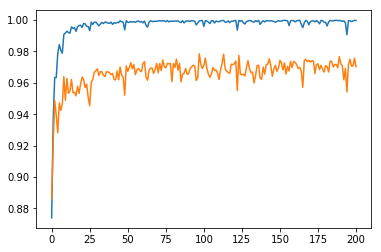

In [26]:
plt.plot(train_log)
plt.plot(valid_log)
plt.savefig('visualizations/' + 'training.png', bbox_inches='tight')

In [27]:
# Test accuracy (unseen yet)
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./models/lenet_200.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./models/'))
    
    test_accuracy = evaluate_epoch(X_test_final, y_test)
    
    print("Test set accuracy is:", test_accuracy)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./models/lenet_200
Test set accuracy is: 0.9452098179410963


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(12, 32, 32, 1)


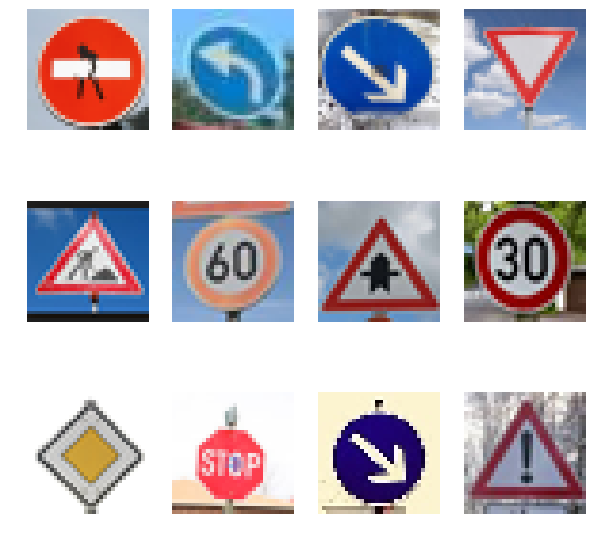

In [39]:
# Reinitialize and re-import if starting a new kernel here
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2


### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(3,4, figsize=(10, 10))
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('./new_trafic_signs/*.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)

my_images = np.asarray(my_images)

my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)

my_images_normalized = (my_images_gry - 128)/128 

print(my_images_normalized.shape)

In [40]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# Number of new images
n_new = 12

my_labels = [17, 34, 38, 13, 25, 3, 11, 1, 12, 14, 38, 18]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./models/lenet_200.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./models/'))
    my_accuracy = evaluate_epoch(my_images_normalized, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./models/lenet_200
Test Set Accuracy = 0.917


INFO:tensorflow:Restoring parameters from ./models/lenet_200


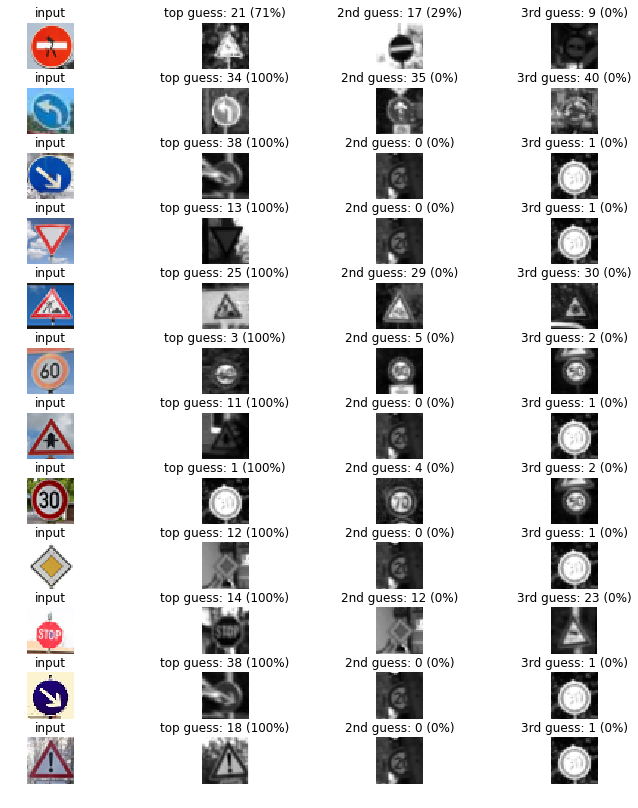

In [46]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./models/lenet_200.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./models/'))
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(my_images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid_final[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid_final[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid_final[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))
        

plt.savefig('visualizations/' + 'top3_img.png', bbox_inches='tight')

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

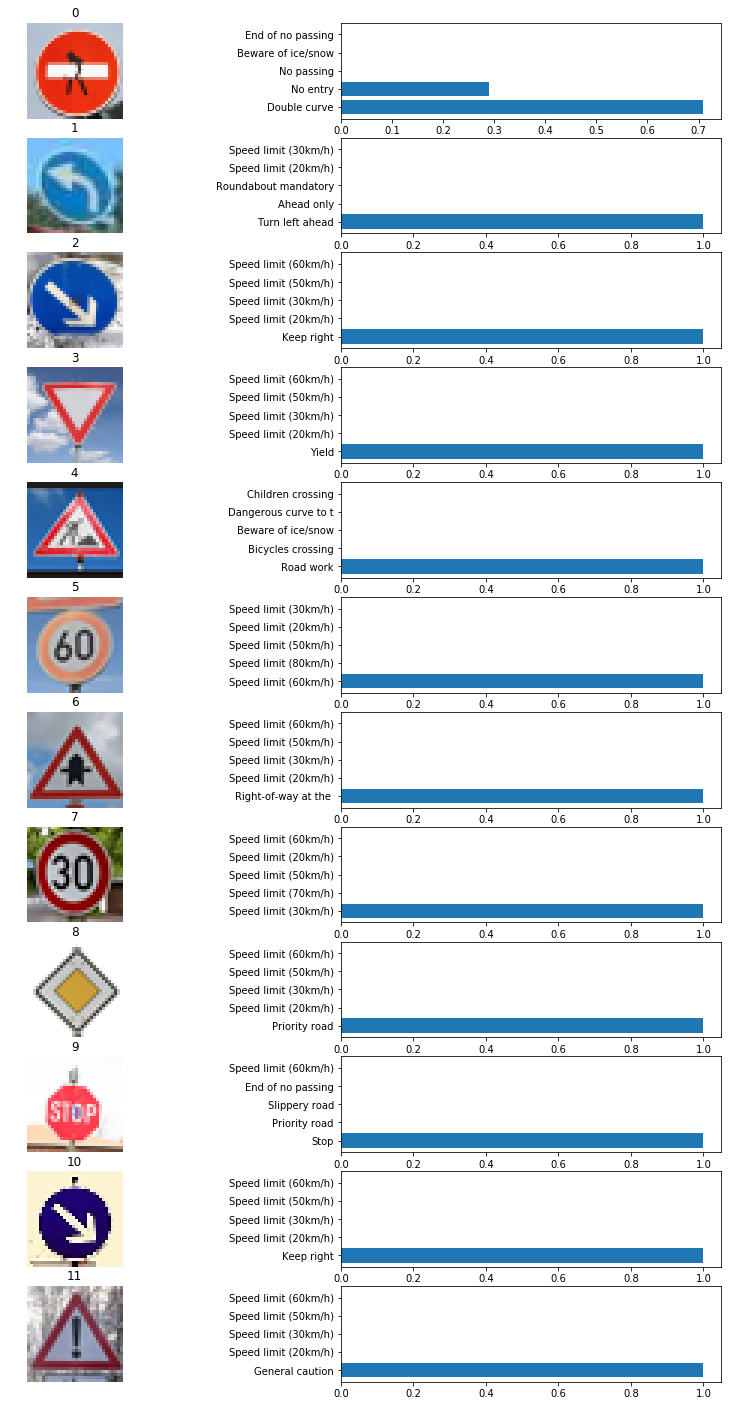

In [42]:
# Plot results.
plt.figure(figsize=(15, 25))
for i in range(n_new):
    plt.subplot(n_new, 2, 2*i+1)
    plt.imshow(cv2.cvtColor(my_images[i], cv2.COLOR_BGR2RGB))
    plt.title(i)
    plt.axis('off')
    plt.subplot(n_new, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), my_top_k.values[i, :])
    labels = [signs_class[j][:20] for j in my_top_k.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labels)
plt.savefig('visualizations/' + 'top5.png', bbox_inches='tight')
plt.show()

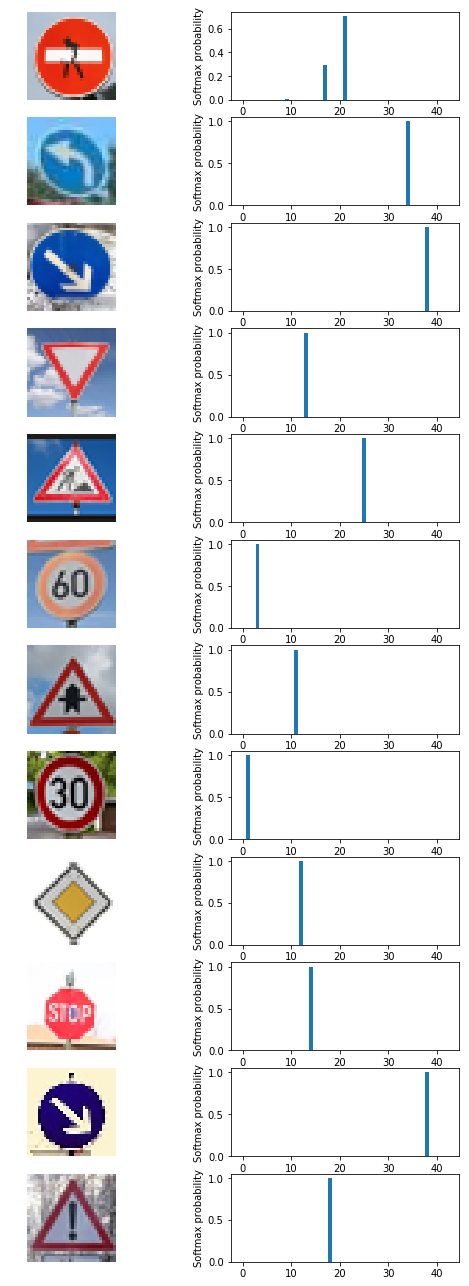

In [43]:
fig, axs = plt.subplots(n_new,2, figsize=(9, 23))
axs = axs.ravel()

for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(cv2.cvtColor(my_images[i//2], cv2.COLOR_BGR2RGB))
    else:
        axs[i].bar(np.arange(n_classes), my_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')
        

plt.savefig('visualizations/' + 'Softmax_probability.png', bbox_inches='tight')

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from ./models/lenet_200


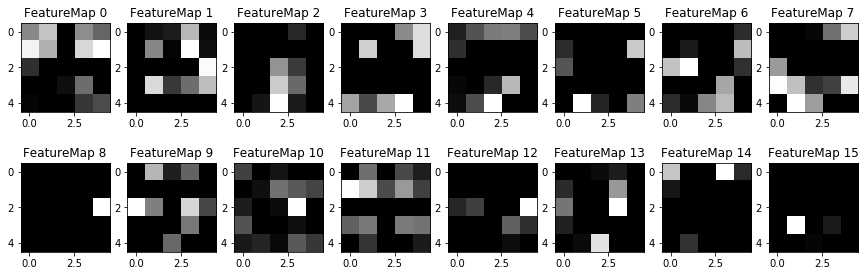

In [45]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session= tf.get_default_session(), feed_dict={x: image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")       
            
with tf.Session() as sess:
    X_final_graph = my_images_normalized
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, tf.train.latest_checkpoint('./models/'))
    conv1 = sess.graph.get_tensor_by_name('convolution1:0')
    outputFeatureMap(X_final_graph,conv1, activation_min=-1, activation_max=-1, plt_num=1)
    conv2 = sess.graph.get_tensor_by_name('convolution2:0')
    outputFeatureMap(X_final_graph,conv2, activation_min=-1, activation_max=-1, plt_num=1)
    

plt.savefig('visualizations/' + 'FeatureMap.png', bbox_inches='tight')